Task 4.1

Accuracy: 0.9213483146067416


Text(0, 0.5, 'Feature 2')

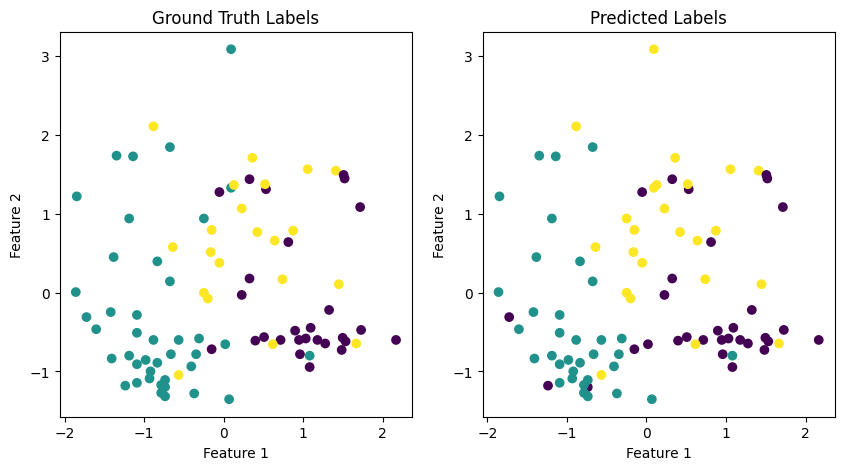

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
loadData = np.load("wineData.npy")
loadLabels = np.load("wineLabels.npy")
split = 0.5
split_index = int(len(loadData)*split)
trainData = loadData[:split_index]
trainLabels = loadLabels[:split_index]
testData = loadData[split_index:]
testLabels = loadLabels[split_index:]

scaler = StandardScaler()
trainData_scaled = scaler.fit_transform(trainData)
testData_scaled = scaler.fit_transform(testData)

svm= SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm.fit(trainData_scaled, trainLabels)
predictions = svm.predict(testData_scaled)
accuracy = svm.score(testData_scaled, testLabels)
print("Accuracy:", accuracy)

plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.scatter(testData_scaled[:, 0], testData_scaled[:, 1], c=testLabels, cmap='viridis')
plt.title('Ground Truth Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualize the test data with predicted labels
plt.subplot(1, 2, 2)
plt.scatter(testData_scaled[:, 0], testData_scaled[:, 1], c=predictions, cmap='viridis')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


Task 4.2

Number of features: 13
Number of training samples: 142
Number of testing samples: 36
Number of classes: 3
Minimums of the features are: [-2.50599976 -1.45191765 -3.82435    -2.65129863 -2.05767855 -1.98868074
 -1.60662194 -1.77198095 -1.9725091  -1.45764758 -2.03126627 -1.77336372
 -1.53584725]
Maximums of the features are: [2.15663739 3.0797355  2.15468883 3.22795554 4.29879167 2.51395137
 1.95698478 2.24161026 2.94868072 3.40864438 3.20566235 1.99768499
 3.08313267]
Epoch 1/500
4/4 [==============================] - 1s 113ms/step - loss: 1.0352 - sparse_categorical_accuracy: 0.3097 - val_loss: 0.9158 - val_sparse_categorical_accuracy: 0.4138
Epoch 2/500
4/4 [==============================] - 0s 20ms/step - loss: 1.0233 - sparse_categorical_accuracy: 0.3097 - val_loss: 0.9073 - val_sparse_categorical_accuracy: 0.4138
Epoch 3/500
4/4 [==============================] - 0s 22ms/step - loss: 1.0121 - sparse_categorical_accuracy: 0.3097 - val_loss: 0.8991 - val_sparse_categorical_accuracy:

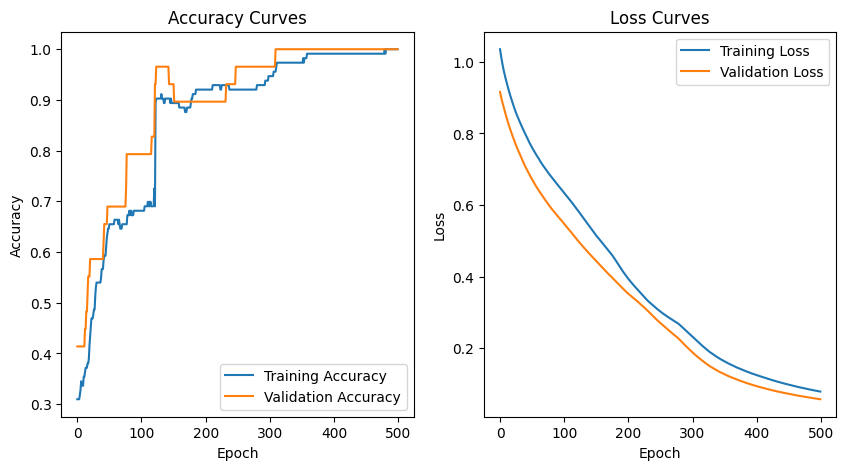

Test set loss: 0.06, test set accuracy: 100.00%
2/2 [==============================] - 0s 7ms/step


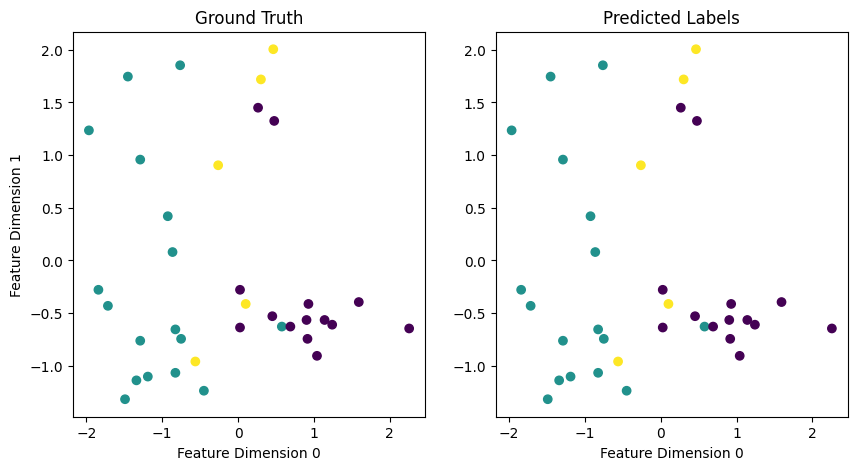

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')
X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)
normaliser = StandardScaler()
X_trn = normaliser.fit_transform(X_trn)
X_tst = normaliser.transform(X_tst)
print(f'Number of features: {X_trn.shape[1]}')
print(f'Number of training samples: {X_trn.shape[0]}')
print(f'Number of testing samples: {X_tst.shape[0]}')
print(f'Number of classes: {len(np.unique(y_trn))}')
print(f'Minimums of the features are: {X_trn.min(0)}')
print(f'Maximums of the features are: {X_trn.max(0)}')
# Creating and compiling the model
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_trn)), activation=tf.nn.softmax)])
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
history = model.fit(X_trn, y_trn, epochs=500, validation_split=0.2, verbose=1)
results = model.evaluate(X_tst, y_tst,batch_size=128)

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_tst[:,0], X_tst[:,1], c=np.argmax(model.predict(X_tst), axis=1))
plt.show()

Task 4.3

Number of features: 28
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Shape of flattened training data: (60000, 784)
Shape of flattened testing data: (10000, 784)
Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2874 - accuracy: 0.9184 - val_loss: 0.1618 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1266 - accuracy: 0.9631 - val_loss: 0.1196 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0866 - accuracy: 0.9744 - val_loss: 0.1006 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0646 - accuracy: 0.9810 - val_loss: 0.1012 - val_accuracy: 0.9678
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0839 - val_accuracy: 0.9735
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - los

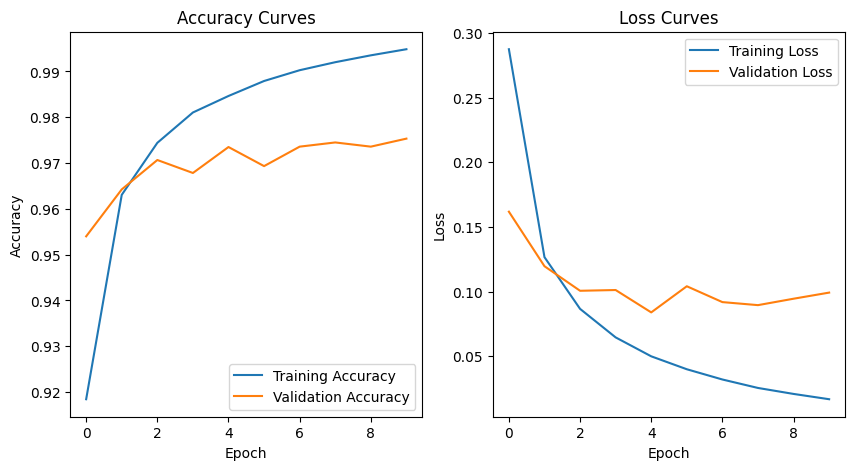

313/313 [==============================] - 1s 3ms/step
Test set accuracy: 97.68%


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'Number of features: {x_train.shape[1]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')
#Reshape, flatten 28x28 to get 784, and 10,000 or 60,000 is number of samples
x_train_flat = np.reshape(x_train, (x_train.shape[0], -1))
x_test_flat = np.reshape(x_test, (x_test.shape[0], -1))
# Normalize
print(f'Shape of flattened training data: {x_train_flat.shape}')
print(f'Shape of flattened testing data: {x_test_flat.shape}')
x_train_normalized = x_train_flat / 255.0
x_test_normalized = x_test_flat / 255.0

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2)

# Plot training curves
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss Curves')
plt.show()
predictions = model.predict(x_test_normalized)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Evaluate accuracy

correct_predictions = np.sum(predicted_labels == y_test)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples * 100

# Report accuracy
print(f'Test set accuracy: {accuracy:0.2f}%')

Task 4.4

Number of features: 28
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Epoch 1/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1671 - accuracy: 0.9489 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 3/10
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 4/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0499 - val_accuracy: 0.9853
Epoch 5/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0562 - val_accuracy: 0.9854
Epoch 6/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0545 - val_accuracy: 0.9872
Epoch 7/10
1

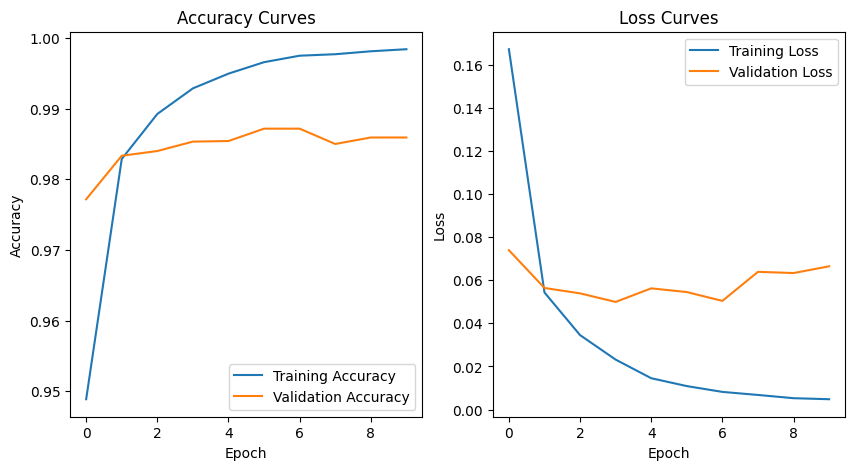

313/313 [==============================] - 3s 9ms/step - loss: 0.0549 - accuracy: 0.9869
Test set loss: 0.05, test set accuracy: 98.69%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'Number of features: {x_train.shape[1]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

# Add channel dimension to the data
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)

# Normalize the data
x_train_normalized = x_train_expanded / 255.0
x_test_normalized = x_test_expanded / 255.0

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2)

# Plot training curves
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# Evaluate the model on the testing set
results = model.evaluate(x_test_normalized, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')
